<a href="https://colab.research.google.com/github/galettomatias/DS_GALETTO/blob/main/DS_GALETTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introducción
Contexto
Los accidentes cerebrovasculares (ACV) son una de las principales causas de muerte y discapacidad en todo el mundo. La identificación temprana de los factores de riesgo asociados con los ACV es crucial para la prevención y el tratamiento efectivos. Con el avance de las tecnologías de análisis de datos y el aprendizaje automático, es posible desarrollar modelos predictivos que ayuden a identificar a las personas con alto riesgo de sufrir un ACV.

Objetivo
El objetivo de este proyecto es desarrollar un modelo predictivo utilizando técnicas de aprendizaje automático que permita identificar a los pacientes con mayor probabilidad de sufrir un accidente cerebrovascular. Para ello, utilizaremos un conjunto de datos que incluye información demográfica, historial médico, hábitos de vida y resultados de salud de los pacientes.

Conjunto de Datos
El conjunto de datos utilizado en este proyecto proviene de un estudio de salud que recopila información sobre los siguientes aspectos:

Identificador del paciente (id): Un identificador único para cada paciente.

Género (gender): Género del paciente (Masculino/Femenino).


Edad (age): Edad del paciente.


Hipertensión (hypertension): Si el paciente tiene hipertensión (0: No, 1: Sí).

Enfermedad cardíaca (heart_disease): Si el paciente tiene
enfermedad cardíaca (0: No, 1: Sí).

Estado civil (ever_married): Si el paciente ha estado casado (Sí/No).

Tipo de trabajo (work_type): Tipo de trabajo que realiza el paciente.

Tipo de residencia (Residence_type): Tipo de residencia (Urbana/Rural).

Nivel promedio de glucosa (avg_glucose_level): Nivel promedio de glucosa en la sangre.

Índice de Masa Corporal (bmi): Índice de Masa Corporal.

Estado de tabaquismo (smoking_status): Estado de tabaquismo del paciente (anteriormente fumador, nunca fumador, fuma).

Accidente cerebrovascular (stroke): Si el paciente ha tenido un accidente cerebrovascular (0: No, 1: Sí).


Hipótesis de Interés

Hipótesis 1: La hipertensión y la enfermedad cardíaca están fuertemente asociadas con un mayor riesgo de sufrir un accidente cerebrovascular.

Hipótesis 2: Los pacientes con niveles elevados de glucosa en sangre y un índice de masa corporal (IMC) alto tienen un mayor riesgo de sufrir un accidente cerebrovascular.

Hipótesis 3: Los hábitos de tabaquismo y el tipo de residencia influyen en la probabilidad de sufrir un accidente cerebrovascular.


**Cargar el archivo CSV**

In [2]:
#importar librearias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#importar Dataframe y mostrar las primeras 10 filas:
df_healthcare = pd.read_csv ('https://raw.githubusercontent.com/galettomatias/DS_GALETTO/main/healthcare-dataset-stroke-data%20(1).csv') #,index_col = 0)
df_healthcare.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [20]:
#Ponemos de Index a ID
df_healthcare.set_index('id', inplace=True)
df_healthcare

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [21]:
#Shape o Forma del dataset.
df_healthcare.shape

(5110, 11)

In [22]:
#Tipo de datos en cada columna
df_healthcare.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [23]:
#Retorna solo las variables numericas, incluye varias estadísticas descriptivas, como la media, la mediana, el máximo, el mínimo, los cuartiles, etc. para cada columna
df_healthcare.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [24]:
# Verificar si hay valores faltantes
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [25]:
#Como a la edad (age) la toma como float64 es porque hay valores con decimales, vamos a transforar los valores a enteros
# Redondear las edades al entero más cercano
df_healthcare['age'] = df_healthcare['age'].round().astype(int)

# Convertir columnas categóricas a tipo 'category'
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
for col in categorical_columns:
    df_healthcare[col] = df_healthcare[col].astype('category')


# Imprimir el DataFrame modificado
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   int64   
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(6), float64(2), int64(3)
memory usage: 270.4 KB


In [26]:
df_healthcare.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237
std,22.612731,0.296607,0.226063,45.283560,7.854067
min,0.000000,0.000000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,0.000000,77.245000,23.500000
50%,45.000000,0.000000,0.000000,91.885000,28.100000
75%,61.000000,0.000000,0.000000,114.090000,33.100000
max,82.000000,1.000000,1.000000,271.740000,97.600000


In [27]:
# Cantidad de filas por columnas
df_healthcare.count()

#BMI presenta valores faltantes

gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [28]:
#Reviso el total de datos faltantes en las columnas con nulos
df_healthcare.isnull().sum()

#se confirma la ausencia de datos de esa columna

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [29]:
#CAMBIAR DATOS FALTANTE DE LA COLUMNA BMI POR LA MEDIA
# Calcular la media de columna BMI
median_bmi = df_healthcare['bmi'].median()

df_healthcare['bmi'].fillna(median_bmi, inplace=True)
df_healthcare

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [49]:
#Reviso el total de datos faltantes en las columnas con nulos
df_healthcare.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

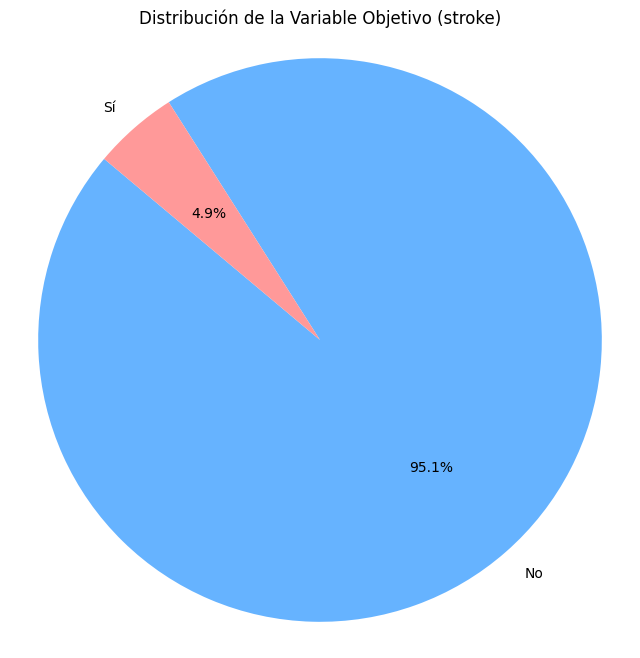

In [50]:
# Gráfico de torta de la distribución de la variable objetivo (stroke)
stroke_counts = df_healthcare['stroke'].value_counts()
stroke_labels = ['No', 'Sí']

plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribución de la Variable Objetivo (stroke)')
plt.axis('equal')  # Asegurar que el gráfico de torta es un círculo
plt.show()

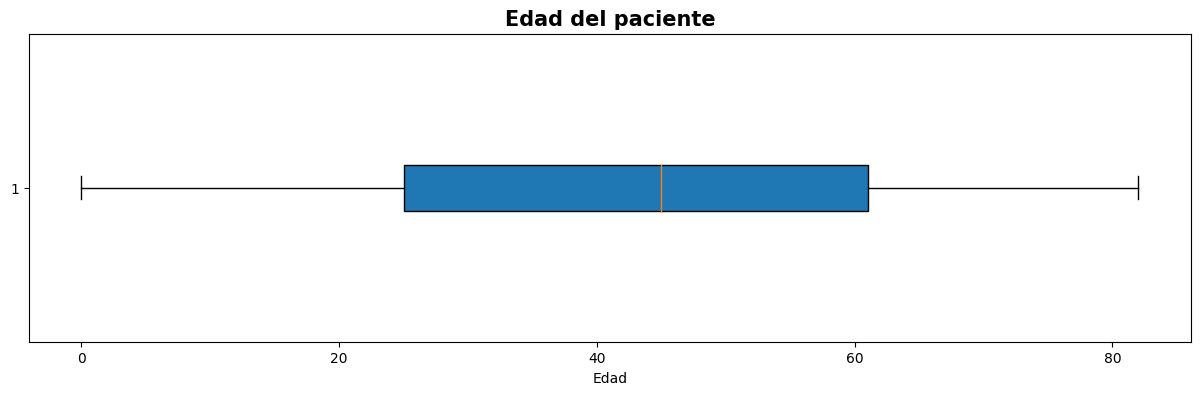

In [39]:
#Boxplot realizado con Matplotlib
fig, ax = plt.subplots(figsize=(15,4))
plt.boxplot (df_healthcare['age'],vert=False, patch_artist= True)
#pongo etiquetas:
ax.set_title('Edad del paciente', fontsize= 15, fontweight= 'bold')
ax.set_xlabel('Edad')
plt.show()

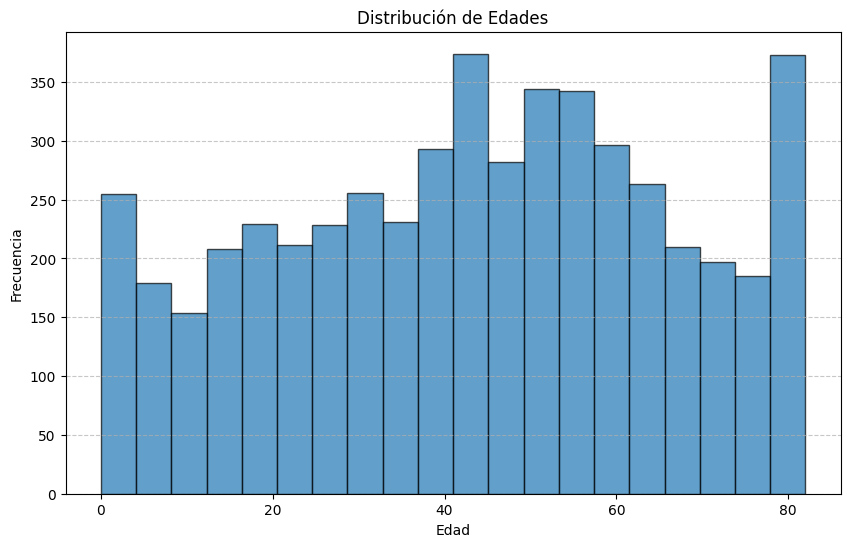

In [40]:
# Crear un histograma de la columna 'age'
plt.figure(figsize=(10, 6))
plt.hist(df_healthcare['age'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el histograma
plt.show()

In [41]:
#Para corroborar los valores calculo la mediana, el valor minimo y maximo
median_age= df_healthcare['age'].median().round(1)
print ("Mediana: ", median_age)

max_age= df_healtcare['age'].max()
print ("Maximo: ", max_age)

min_age= df_healtcare['age'].min() #la persona de menor edad tiene 0,08 años
print ("Minimo: ", min_age)

Mediana:  45.0
Maximo:  82
Minimo:  0


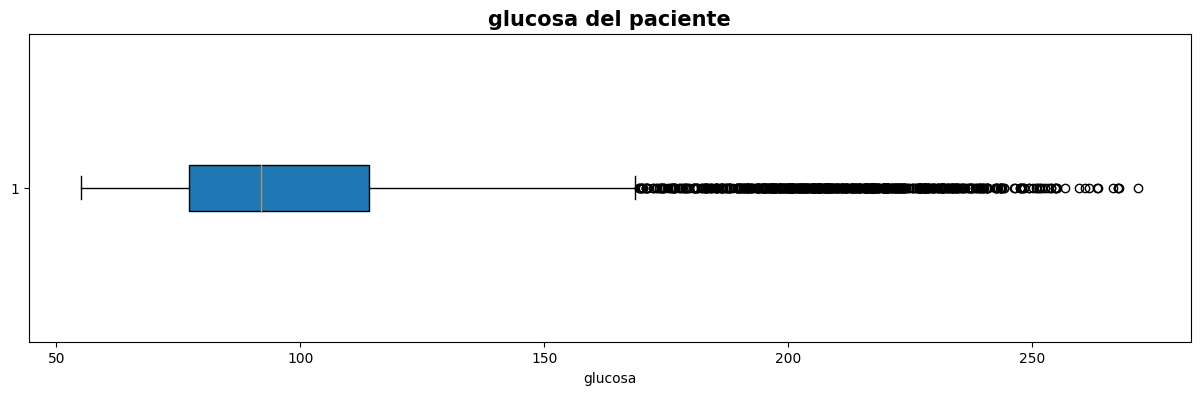

In [42]:
#Boxplot realizado con Matplotlib
fig, ax = plt.subplots(figsize=(15,4))
plt.boxplot (df_healthcare['avg_glucose_level'],vert=False, patch_artist= True)
#pongo etiquetas:
ax.set_title('glucosa del paciente', fontsize= 15, fontweight= 'bold')
ax.set_xlabel('glucosa')
plt.show()

In [43]:
#Para corroborar los valores calculo la mediana, el valor minimo y maximo

print (df_healthcare['avg_glucose_level'].median().round (1))
print (df_healthcare['avg_glucose_level'].max())
print (df_healthcare['avg_glucose_level'].min())

91.9
271.74
55.12


Hipótesis 1: Hipertensión, Enfermedad Cardíaca y Accidentes Cerebrovasculares

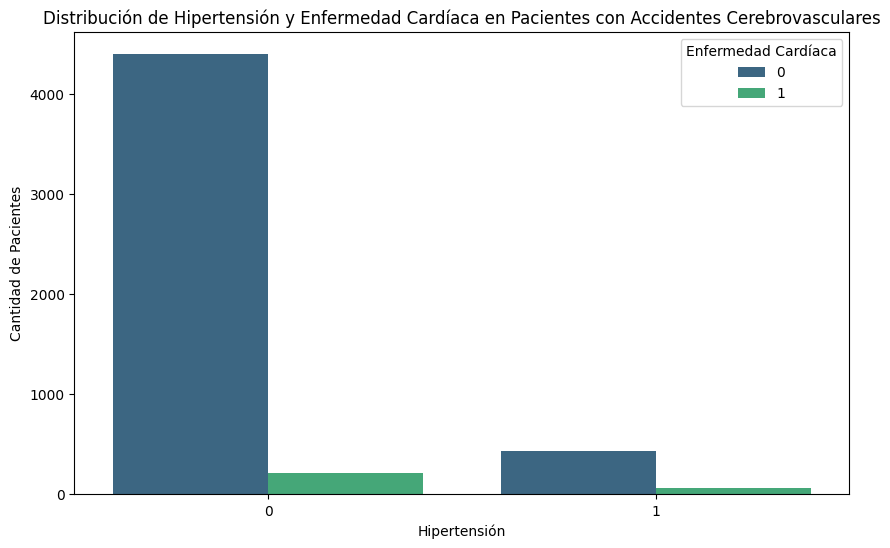

In [45]:
# Gráfico de hipertensión, enfermedad cardíaca y accidentes cerebrovasculares
plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', hue='heart_disease', data= df_healthcare, palette='viridis')
plt.title('Distribución de Hipertensión y Enfermedad Cardíaca en Pacientes con Accidentes Cerebrovasculares')
plt.xlabel('Hipertensión')
plt.ylabel('Cantidad de Pacientes')
plt.legend(title='Enfermedad Cardíaca', loc='upper right')
plt.show()

Hipótesis 2: Glucosa, IMC y Accidentes Cerebrovasculares



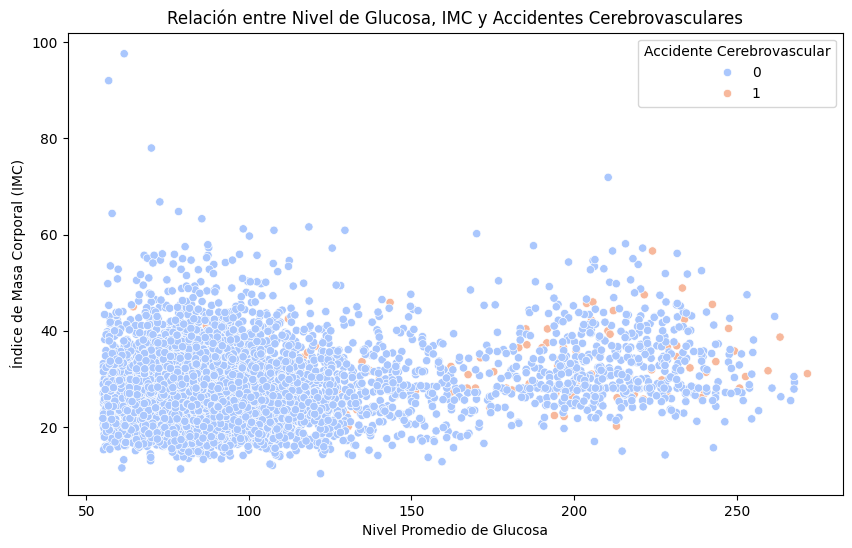

In [46]:
# Gráfico de nivel promedio de glucosa, IMC y accidentes cerebrovasculares
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=df_healthcare, palette='coolwarm')
plt.title('Relación entre Nivel de Glucosa, IMC y Accidentes Cerebrovasculares')
plt.xlabel('Nivel Promedio de Glucosa')
plt.ylabel('Índice de Masa Corporal (IMC)')
plt.legend(title='Accidente Cerebrovascular', loc='upper right')
plt.show()

El gráfico de dispersión muestra la relación entre el nivel promedio de glucosa, el IMC y los accidentes cerebrovasculares. Una mayor densidad de puntos en el cuadrante superior derecho puede indicar una correlación entre niveles altos de glucosa, IMC alto y la incidencia de ACV.


Hipótesis 3: Tabaquismo, Residencia y Accidentes Cerebrovasculares

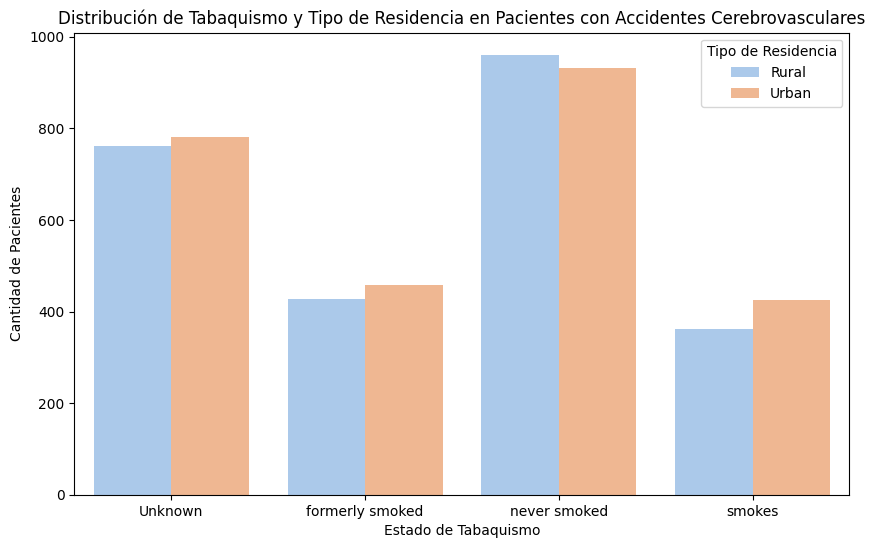

In [47]:
# Gráfico de estado de tabaquismo, tipo de residencia y accidentes cerebrovasculares
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status', hue='Residence_type', data=df_healthcare, palette='pastel')
plt.title('Distribución de Tabaquismo y Tipo de Residencia en Pacientes con Accidentes Cerebrovasculares')
plt.xlabel('Estado de Tabaquismo')
plt.ylabel('Cantidad de Pacientes')
plt.legend(title='Tipo de Residencia', loc='upper right')
plt.show()

El gráfico de barras muestra cómo el estado de tabaquismo y el tipo de residencia se distribuyen entre los pacientes con ACV. Esto puede ayudar a identificar patrones específicos en estas subpoblaciones.
